In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # used for pattern matching and text manipulation.
import string
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv(r"/content/train_data.csv",sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genre'].value_counts()
    for x_label, grp in _df_3.groupby('Title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Title')
_ = plt.ylabel('Genre')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Description'].value_counts()
    for x_label, grp in _df_4.groupby('Genre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genre')
_ = plt.ylabel('Description')

In [ ]:
data.head()

,Title,Genre,Description
"""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
"""2",Cupid (1997),thriller,A brother and sister with a past incestuous r...
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...


from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genre'].value_counts()
    for x_label, grp in _df_8.groupby('Title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Title')
_ = plt.ylabel('Genre')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Description'].value_counts()
    for x_label, grp in _df_9.groupby('Genre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genre')
_ = plt.ylabel('Description')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, "1  to "54214 
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
print(data.info)

<bound method DataFrame.info of                                                 Title          Genre  \
"1                      Oscar et la dame rose (2009)          drama    
"2                                      Cupid (1997)       thriller    
"3                  Young, Wild and Wonderful (1980)          adult    
"4                             The Secret Sin (1915)          drama    
"5                            The Unrecovered (2007)          drama    
...                                               ...            ...   
"54210                             ""Bonino"" (1953)         comedy    
"54211                   Dead Girls Don't Cry (????)         horror    
"54212     Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
"54213                      Make Your Own Bed (1944)         comedy    
"54214    Nature's Fury: Storm of the Century (2006)        history    

                                               Description  
"1        Listening in to a conversation b

In [ ]:
data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

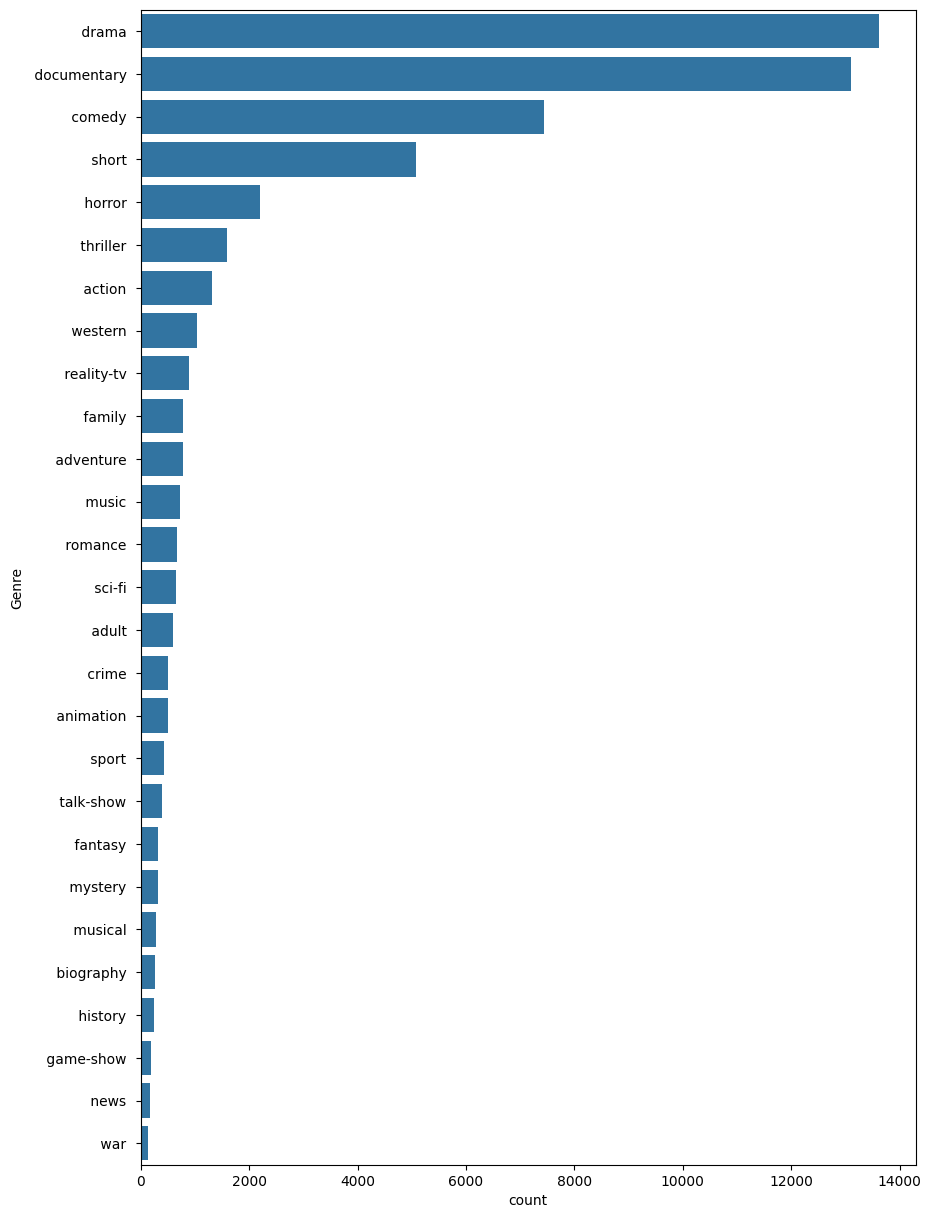

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(data=data, y="Genre", order= data["Genre"].value_counts().index)
plt.show()

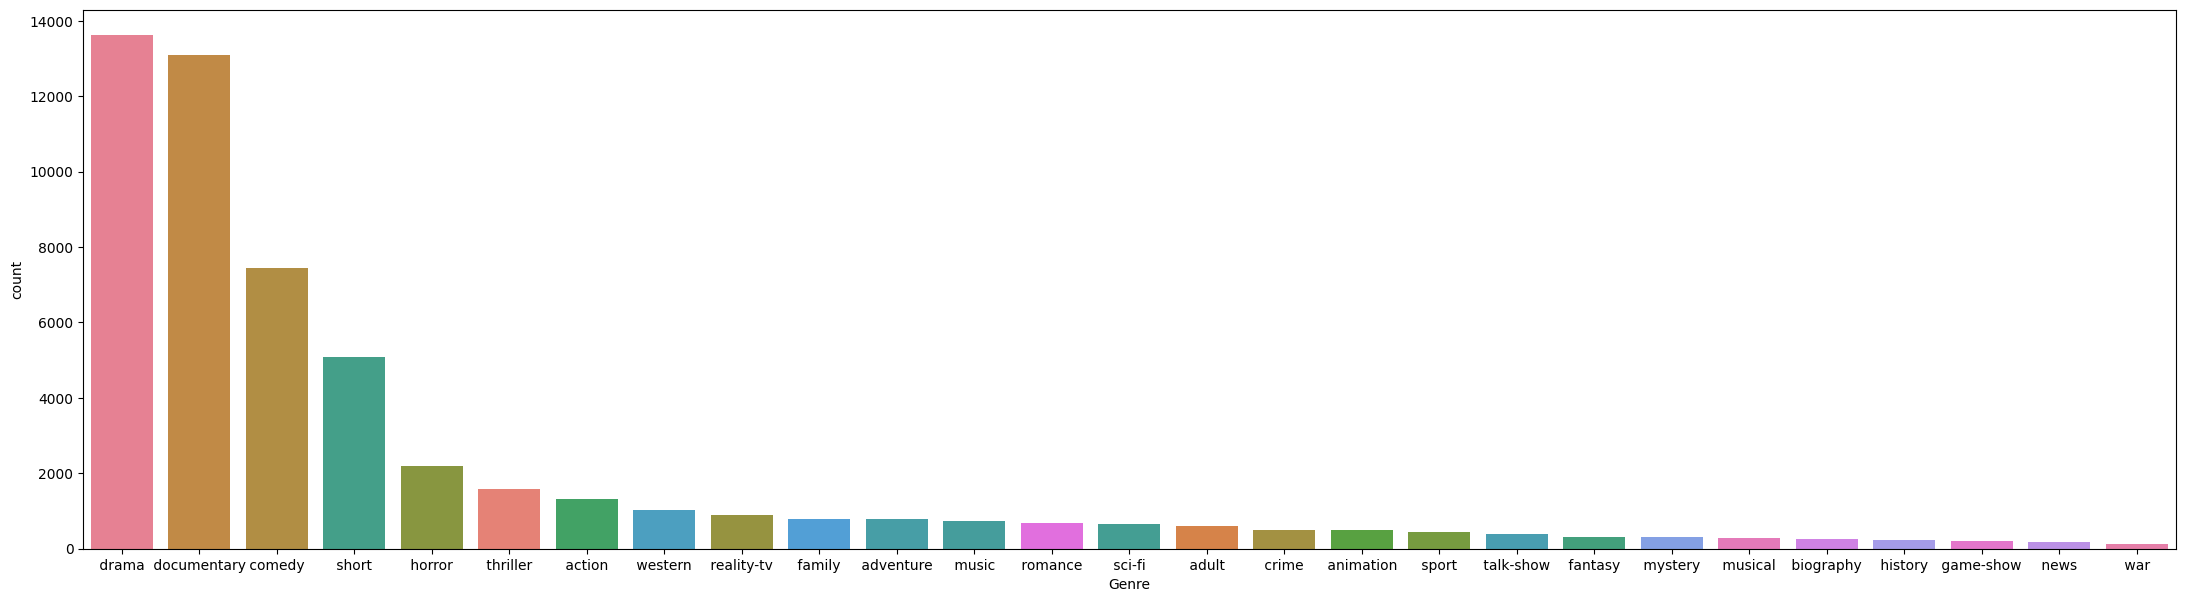

In [ ]:
plt.figure(figsize=(27,7))

sns.countplot(data=data, x="Genre", order= data["Genre"].value_counts().index, hue="Genre", legend=False)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

data["TextCleaning"] = data["Description"].apply(cleaning_data)
data["TextCleaning"] = data["Description"].apply(cleaning_data)

In [ ]:
data

,Title,Genre,Description,TextCleaning
"""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
"""2",Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
"""54210","""""Bonino"""" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
"""54211",Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
"""54212",Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
"""54213",Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [ ]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(data["TextCleaning"])

X_test = vectorize.transform(data["TextCleaning"])

In [ ]:
X = X_train
y = data["Genre"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.4, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
classifier.score(X_train,Y_train)

0.7133853910477127

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([' drama ', ' drama ', ' documentary ', ..., ' documentary ',
       ' documentary ', ' drama '], dtype=object)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5717513603246334
